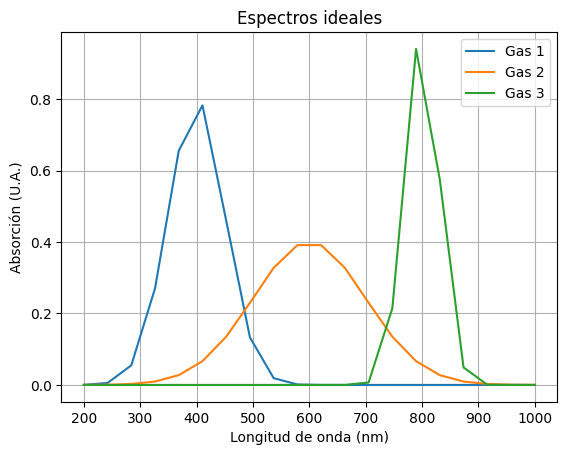

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bandas = 20
long_onda = np.linspace(200, 1000, bandas)

def espectro_gaussiano(mu, sigma, amplitud=1.0):
    return amplitud * np.exp(-0.5 * ((long_onda - mu) / sigma) ** 2)

gas1_espectro = espectro_gaussiano(mu=400, sigma=50, amplitud=.8)
gas2_espectro = espectro_gaussiano(mu=600, sigma=100, amplitud=.4)
gas3_espectro = espectro_gaussiano(mu=800, sigma=30)

plt.plot(long_onda, gas1_espectro, label='Gas 1')
plt.plot(long_onda, gas2_espectro, label='Gas 2')
plt.plot(long_onda, gas3_espectro, label='Gas 3')
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Absorción (U.A.)")
plt.title("Espectros ideales")
plt.legend()
plt.grid(True)
plt.show()

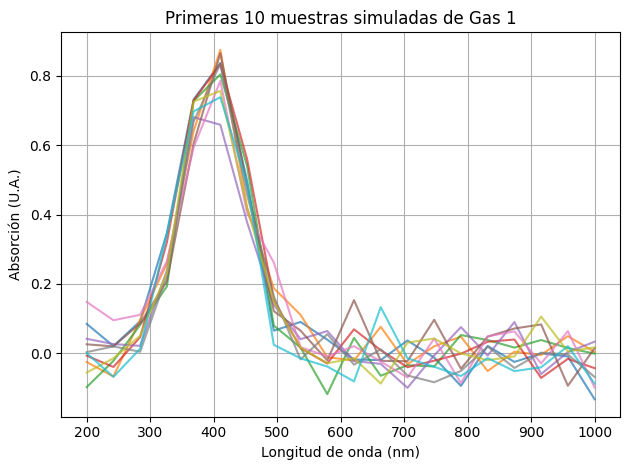

In [ ]:
muestras = 1500

gas1 = gas1_espectro + 0.05 * np.random.randn(muestras // 3, bandas)
gas2 = gas2_espectro + 0.05 * np.random.randn(muestras // 3, bandas)
gas3 = gas3_espectro + 0.05 * np.random.randn(muestras // 3, bandas)

for i in range(10):
    plt.plot(long_onda, gas1[i], alpha=0.7)

plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Absorción (U.A.)')
plt.title('Primeras 10 muestras simuladas de Gas 1')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Datos y clases
X = np.vstack([gas1, gas2, gas3])
y = np.array([0] * (muestras // 3) + [1] * (muestras // 3) + [2] * (muestras // 3))
y_cat = to_categorical(y, num_classes=3)

# Dividir train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3)

# Modelo
model = Sequential([
    Dense(5, activation='relu', input_shape=(bandas,), name="Oculta"),
    Dense(3, activation='softmax', name="Salida")
])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar
history = model.fit(X_train, y_train, epochs=6, verbose=1, validation_data=(X_test, y_test))

# Evaluar
loss, acc = model.evaluate(X_test, y_test)
print(f'Accuracy en test: {acc:.2f}')

Epoch 1/6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6405 - loss: 0.9477 - val_accuracy: 1.0000 - val_loss: 0.4891
Epoch 2/6
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.3843 - val_accuracy: 1.0000 - val_loss: 0.2135
Epoch 3/6
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.1830 - val_accuracy: 1.0000 - val_loss: 0.1265
Epoch 4/6
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.1200 - val_accuracy: 1.0000 - val_loss: 0.0845
Epoch 5/6
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0749 - val_accuracy: 1.0000 - val_loss: 0.0614
Epoch 6/6
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0514 - val_accuracy: 1.0000 - val_loss: 0.0469
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0435 
Accuracy en test: 1.00


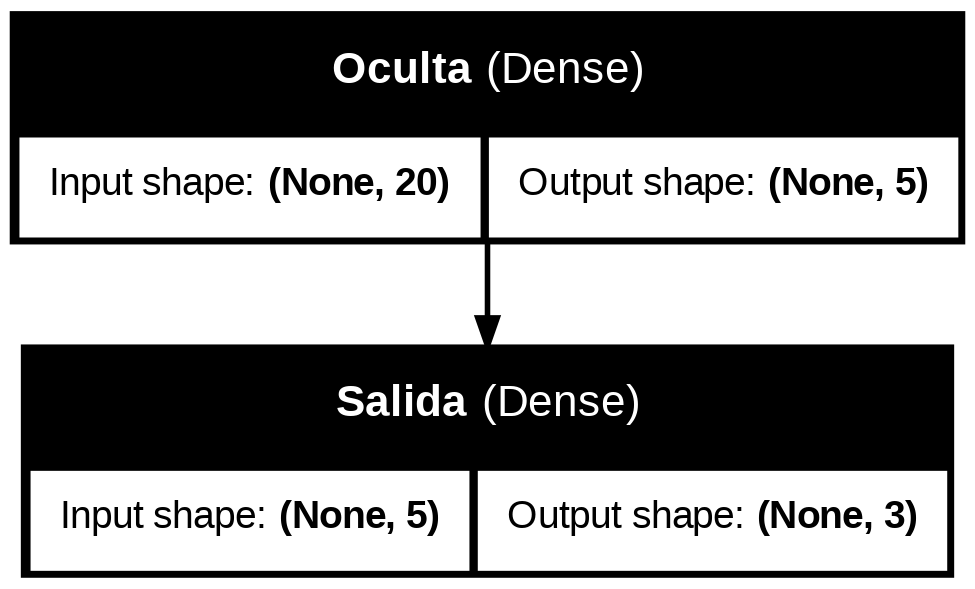

<Figure size 800x300 with 0 Axes>

In [ ]:
from tensorflow.keras.utils import plot_model

plt.figure(figsize=(8, 3))
plot_model(model, show_shapes=True, show_layer_names=True)

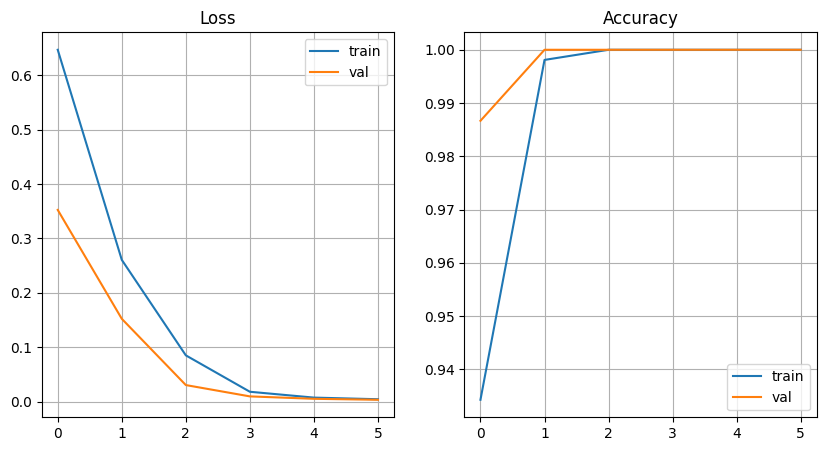

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Probabilidades por clase: [[0.9954093  0.00253659 0.00205408]]
El modelo predice que es el gas número: 1


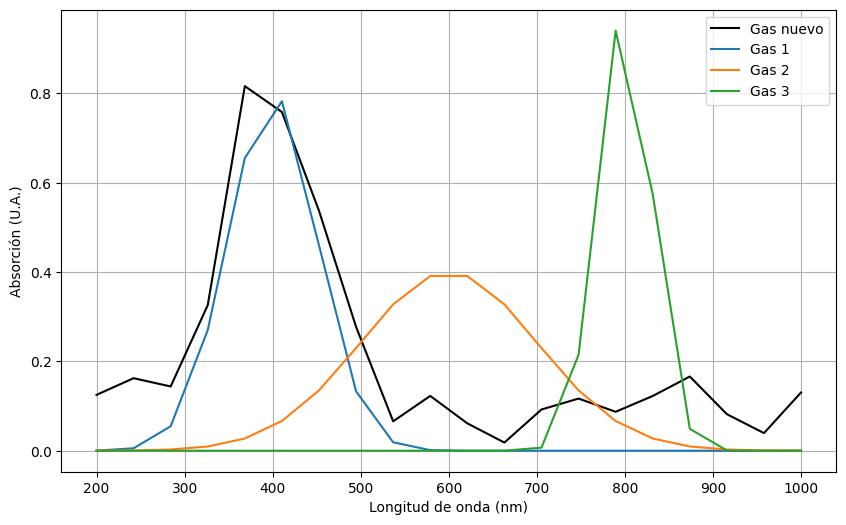

In [ ]:
nuevo_gas = gas1_espectro + 0.1 + 0.05 * np.random.randn(1, bandas)

# Predecir
pred_proba = model.predict(nuevo_gas, verbose=0)

# Mostrar vector de probabilidades
print("Probabilidades por clase:", pred_proba)

# Clase predicha (índice de la clase con mayor probabilidad)
pred_clase = np.argmax(pred_proba)
print(f"El modelo predice que es el gas número: {pred_clase+1}")

# Mostrar la firma espectral
plt.figure(figsize=(10, 6))
plt.plot(long_onda, nuevo_gas.flatten(), label="Gas nuevo", color='k')
plt.plot(long_onda, gas1_espectro, label='Gas 1')
plt.plot(long_onda, gas2_espectro, label='Gas 2')
plt.plot(long_onda, gas3_espectro, label='Gas 3')
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Absorción (U.A.)")
plt.legend()
plt.grid(True)
plt.show()
